# Colisão Elástica

## Esquema da simulação de uma colisão:

#### . Constantes
###### _ m1, m2 (massas em kg)
###### _ v01, v02 (velocidades iniciais em m/s)
###### _ x01, x02 (posições iniciais em m)
###### _ tempo_simulacao (em s)
#### . Velocidade final
###### _ v1 = ((m1 - m2) * v01 + 2 * m2 * v02) / (m1 + m2)
###### _ v2 = ((m2 - m1) * v02 + 2 * m1 * v01) / (m1 + m2)
#### . Onde e quando ocorreu a colisão
###### _ x1 = x01 + v01 * t
###### _ x2 = x02 + v02 * t
###### _ x1 = x2 -> xc (x de colisão)
###### _ quando: x01 + v01 * tc = x02 + v02 * tc  -> tc (tempo de colisão) = (x01 - x02) / (v02 - v01)
###### _ onde: xc = x01 + v01 * tc
### - Código:
#### . Bibliotecas
###### _ matplotlib.pyplot as plt
###### _ matplotlib.animation as animation
###### _ numpy as np

Cálculos concluídos! O tempo gasto foi de 0.0462 segundos
Ocorreram 3141 colisões durante a simulação
O gráfico está diferente porque os blocos não são mais considerados como pontos. Agora ele está plotando considerando o centro dos blocos. Na célula abaixo observa-se a visualização anterior


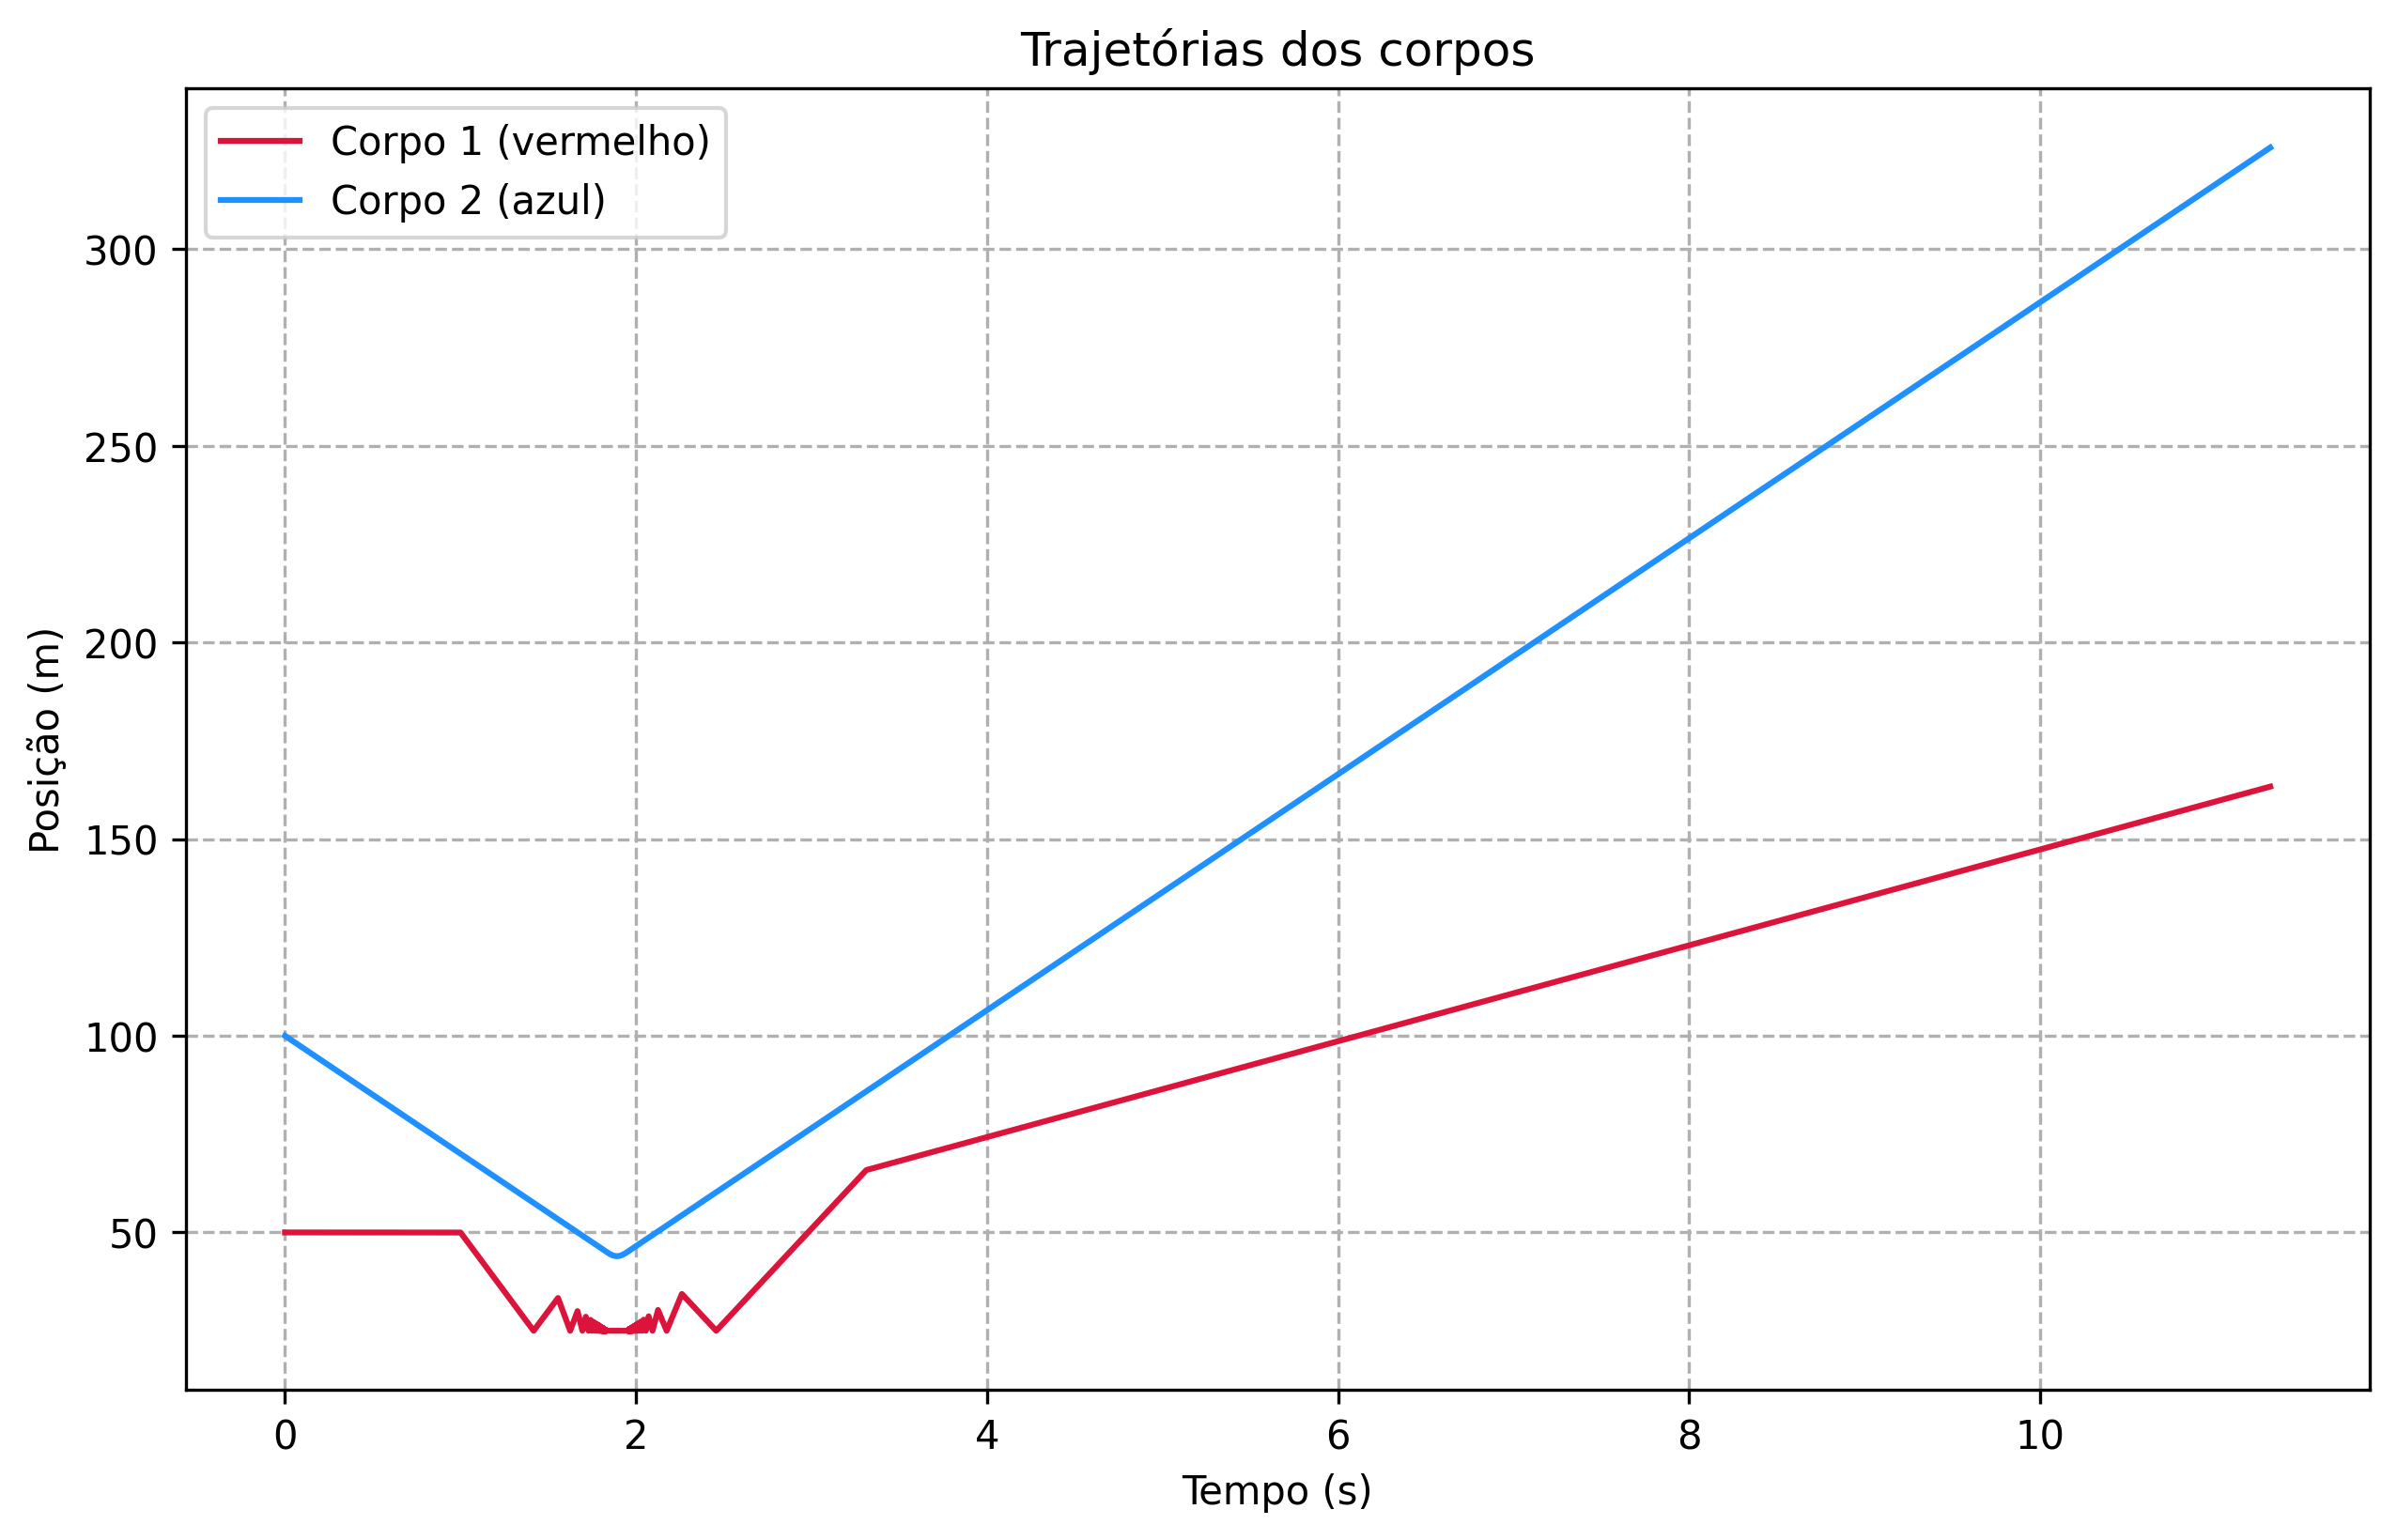

3141
Simulação concluída! Colisões: 3141
Cálculos concluídos! O tempo gasto foi de 0.0488 segundos
Ocorreram 3141 colisões durante a simulação


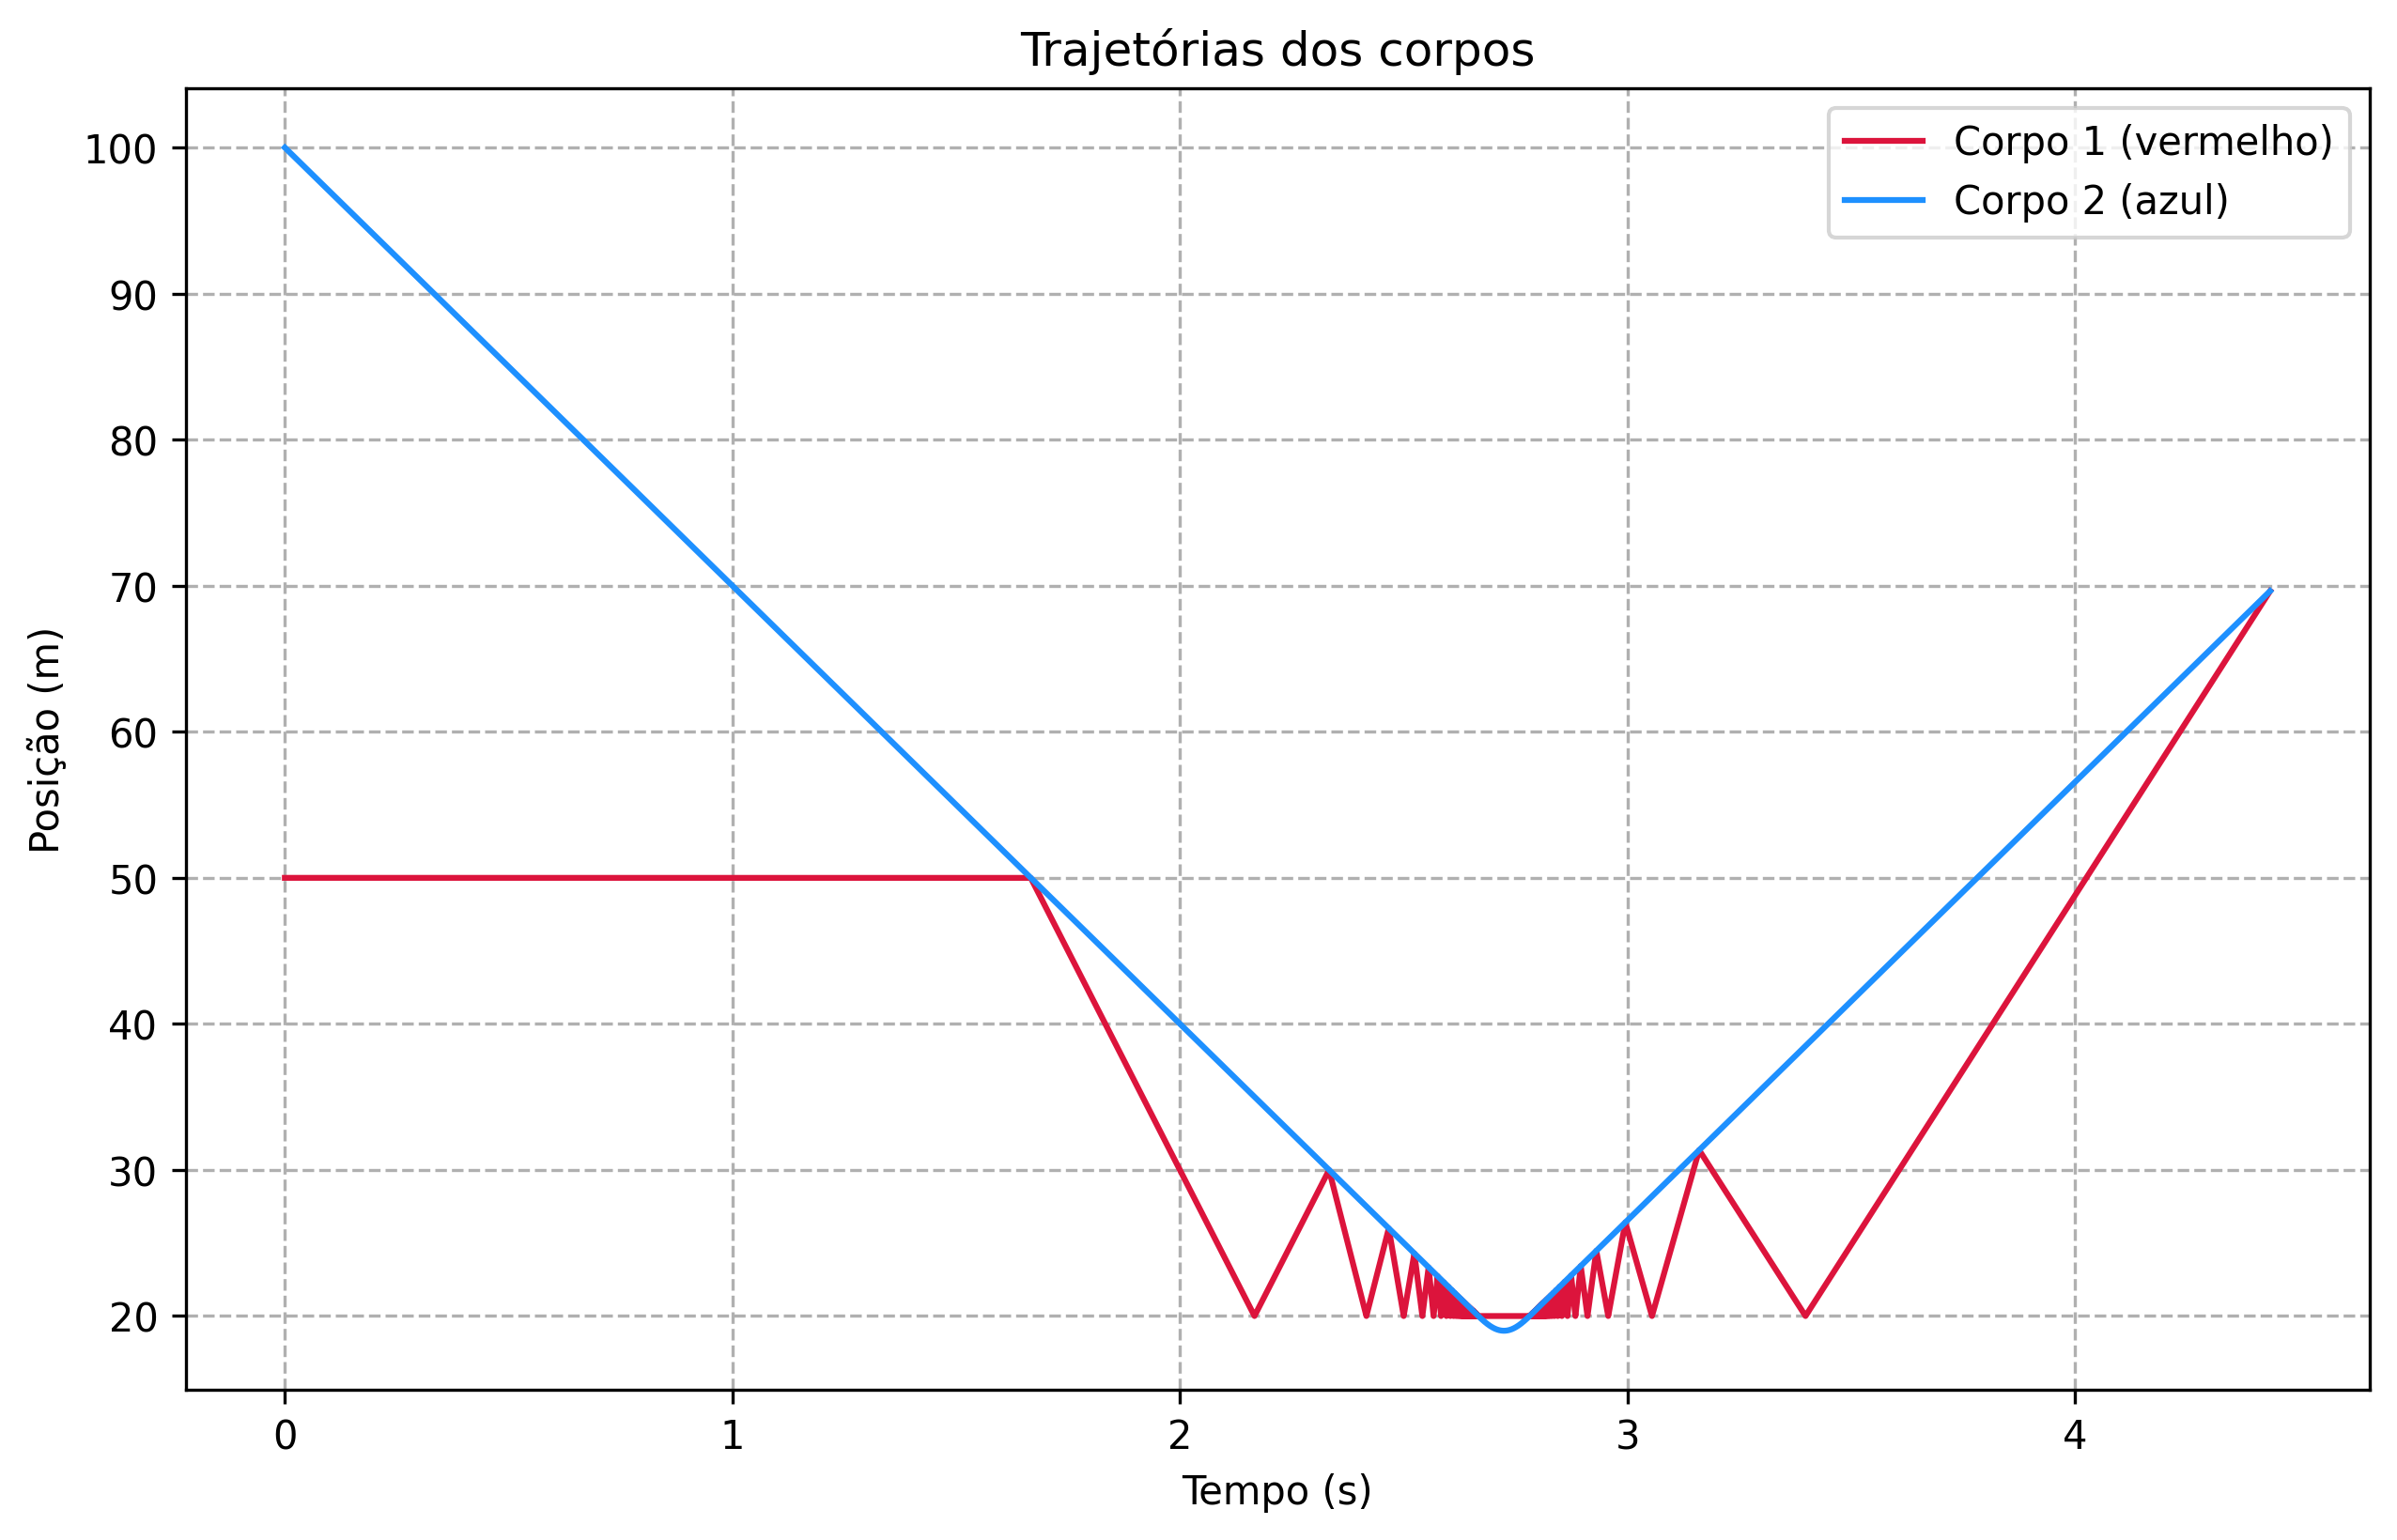

3141


In [ ]:
import matplotlib.pyplot as plt
import pygame
import numpy as np
import time

# BASE FÍSICA

# Definindo constantes
m1, m2 = 1, 1000000  # massas em kg
v01, v02 = 0, -30  # velocidades iniciais em m/s
x01, x02 = 50, 100  # posições iniciais em metros
x_parede = 20  # posição da parede em metros
tempo_simulacao = 40  # segundos


# Função para velocidades após colisão elástica unidimensional
def velocidades_depois_colisao(massa_corpo1, massa_corpo2, velocidade_corpo1, velocidade_corpo2):
    """
    Essa função utiliza a equação de colisão elástica unidimensional entre dois corpos para calcular a velocidade de cada corpo após a colisão.

    Argumentos:
    massa_corpo1: massa do corpo 1
    massa_corpo2: massa do corpo 2 
    velcocidade_corpo1: velocidade do corpo 1 antes da colisão
    velocidade_corpo2: velocidade do corpo 2 antes da colisão

    Retornos:
    v1: velocidade do corpo 1 após a colisão 
    v2: velocidade do corpo 2 após a colisão
    """
    v1 = ((massa_corpo1 - massa_corpo2) * velocidade_corpo1 + 2 * massa_corpo2 * velocidade_corpo2) / (massa_corpo1 + massa_corpo2)
    v2 = ((massa_corpo2 - massa_corpo1) * velocidade_corpo2 + 2 * massa_corpo1 * velocidade_corpo1) / (massa_corpo1 + massa_corpo2)
    
    return v1, v2

# Função posição
def pos(x0, v0, t):
    """
    Essa função utiliza a equação horária da posição para calcular a posição de um corpo a velocidade constante

    Argumentos:
    x0: posição inicial
    v0: velocidade inicial
    t: tempo de movimento

    Retorno:
    Posição do corpo no tempo t 
    """
    return x0 + v0 * t

# Colisão elástica com a parede
def colisao_com_parede(v0):
    """Essa função retorna a velocidade de um corpo que colide com uma parede imóvel de forma elástica"""
    return -v0

# Tamnho dos blocos
def largura_pela_massa(m):
    """Essa função define a largura dos blocos conforme a sua massa"""
    # Talvez dê para procurar uma função que englobe esses pontos
    if 0 < m <= 10: 
        return 10
    elif 10 < m <= 100: 
        return 20
    elif 100 < m <= 10000: 
        return 25
    elif 10000 < m <= 1000000: 
        return 30
    elif 1000000 <= m: 
        return 35


#Variáveis para a simulação
fps = 12000 # A quantidade de frames por segundo (quanto maior esse número, maior o tempo de simulação)
t = np.linspace(0, tempo_simulacao, fps * tempo_simulacao) # Lista de tempos para simulação
x1, x2 = [], [] # Listas de posições ao longo da simulação
l1, l2 = largura_pela_massa(m1), largura_pela_massa(m2)
x1_simulado, x2_simulado = x01, x02 # Posições temporárias durante a simulação
v1_simulado, v2_simulado = v01, v02 # Velocidades temporárias durante a simulação
passo_de_tempo = 1 / fps # Variação de tempo entre cada instante simulado
contador = 0
contador_esquerda = 0
contador_direita = 0
frames = []

tempo_inicio = time.time()
# Fazendo os calculos da simulação
for _ in t:
    #Atualiza a posição
    x1_simulado = pos(x1_simulado, v1_simulado, passo_de_tempo)
    x2_simulado = pos(x2_simulado, v2_simulado, passo_de_tempo)

    #Checa a colisão entre os blocos
    if x1_simulado + (l1/2) >= x2_simulado - (l2/2):
        v1_simulado, v2_simulado = velocidades_depois_colisao(m1, m2, v1_simulado, v2_simulado)
        x1_simulado = x2_simulado - (l1/2) - (l2/2) # Ajuste para considerar a largura dos blocos na colisão (x1 + l1 = x2 - l2 -> x1 = x2 - l2 - l1)
        contador += 1
        contador_esquerda += 1

    #Checa a colisão com a parede
    if x1_simulado - (l1/2) <= x_parede:
        v1_simulado = colisao_com_parede(v1_simulado)
        x1_simulado = x_parede + (l1/2) # Ajuste para considerar a largura dos blocos na colisão 
        contador +=1
        contador_direita += 1

    #Atualiza a lista de posições
    x1.append(x1_simulado)
    x2.append(x2_simulado)
    frames.append((x1_simulado, x2_simulado, contador, contador_esquerda, contador_direita))
    # Checa se já ocorreu o número máximo de colisões
    if v1_simulado >= 0 and v2_simulado >= 0 and v2_simulado > v1_simulado:
        # Adiciona frames extras para facilitar a visualização após o fim das colisões 
        segundos_extras = 8
        passos_extras = int(segundos_extras * fps)

        for _ in range(passos_extras):
            x1_simulado = pos(x1_simulado, v1_simulado, passo_de_tempo)
            x2_simulado = pos(x2_simulado, v2_simulado, passo_de_tempo)
            x1.append(x1_simulado)
            x2.append(x2_simulado)
            frames.append((x1_simulado, x2_simulado, contador, contador_esquerda, contador_direita))
        break
    
tempo_fim = time.time()
tempo_gasto = tempo_fim - tempo_inicio

print(f"Cálculos concluídos! O tempo gasto foi de {tempo_gasto:.4f} segundos")
print(f"Ocorreram {contador} colisões durante a simulação")

# Gráfico de trajetórias 
print("O gráfico está diferente porque os blocos não são mais considerados como pontos. Agora ele está plotando considerando o centro dos blocos. Na célula abaixo observa-se a visualização anterior")
plt.figure(figsize=(10, 6), dpi=300) 
plt.plot(t[:len(x1)], x1, label='Corpo 1 (vermelho)', color = 'crimson')
plt.plot(t[:len(x2)], x2, label='Corpo 2 (azul)', color = 'dodgerblue')
plt.xlabel('Tempo (s)')
plt.ylabel('Posição (m)')
plt.title('Trajetórias dos corpos')
plt.grid(True, linestyle="--")
plt.legend()
plt.show()

print(contador)

# ---------------------------
# Inicializa o Pygame
pygame.init()
pygame.mixer.init()

# Configurações da janela
LARGURA, ALTURA = 1280, 720
tela = pygame.display.set_mode((LARGURA, ALTURA))
pygame.display.set_caption("Simulação de Colisão")

# Cores
BRANCO = (255, 255, 255)
VERMELHO = (255, 0, 0)
AZUL = (0, 0, 255)
PRETO = (0, 0, 0)
LARANJA = (255, 209, 145)
# Ajuste da escala para visualização
espaco_necessario = 200
ESCALA = LARGURA / espaco_necessario  # Escala baseada na quantidade de espaço necessária em metros 

# Tamanho em pixels dos objetos
LADO1, LADO2 = int(l1 * ESCALA), int(l2 * ESCALA )
DIFERENCA = max(LADO1, LADO2) - min(LADO1, LADO2) # Isso é para corrigir uma diferença de altura
altura_do_chao = LARGURA // 2.5

# Loop de simulação
relogio = pygame.time.Clock()
executando = True
simulador_ativo = True
tempo_inicio_animacao = time.time()
contador_esquerda_anterior = 0
contador_direita_anterior = 0
duracao = 0

try:
    while executando:
        tela.fill(PRETO)
        
        # Eventos do sistema (fechar janela e recomeçar)
        for evento in pygame.event.get():
            if evento.type == pygame.QUIT:
                executando = False
            if evento.type == pygame.KEYDOWN and evento.key == pygame.K_r: # Caso a tecla "R" for pressionada a animação irá recomeçar
                simulador_ativo = True
                tempo_inicio_animacao = time.time()
                duracao = 0

        # Nos diz o tempo atual de simulação, isso ajuda sicronizar a animação com o tempo real
        tempo_atual_animacao = time.time() - tempo_inicio_animacao

        if simulador_ativo == True:
            frame_atual = int(tempo_atual_animacao * fps)
            if frame_atual >= len(frames): # Se já chegou ao final mantém o último frame e indica que a animação foi concluida
                frame_atual = len(frames) -1
                simulador_ativo = False
        
        x1_simulado, x2_simulado, contador_atual, contador_esquerda_atual, contador_direita_atual = frames[frame_atual]

        # Conversão de posições físicas para pixels 
        x1_s = int((x1_simulado - l1/2) * ESCALA)  # O -l1/2 serve para transformar os calculos que estavam no centro para o canto esquerdo (o pygame tem como origem o canto superior esquerdo)
        x2_s = int((x2_simulado - l2/2) * ESCALA)
        x_parede_s = int(x_parede * ESCALA) 

        # Desenha a parede
        pygame.draw.line(tela, BRANCO, (x_parede_s, 0), (x_parede_s, altura_do_chao), 4)
        
        # Desenha o bloco 1:
        pygame.draw.rect(tela, VERMELHO, (x1_s, altura_do_chao - LADO1, LADO1, LADO1))
        pygame.draw.rect(tela, BRANCO, (x1_s, altura_do_chao - LADO1, LADO1, LADO1), 2)  # Borda

        # Desenha o bloco 2:
        pygame.draw.rect(tela, AZUL, (x2_s, altura_do_chao - LADO2, LADO2, LADO2))
        pygame.draw.rect(tela, BRANCO, (x2_s, altura_do_chao - LADO2, LADO2, LADO2), 2)  # Borda

        # Desenha a linha no nível da altura do chão
        pygame.draw.line(tela, BRANCO, (x_parede_s,altura_do_chao), (LARGURA, altura_do_chao), 4)
        
        # Adicionando o efieto de partículas na colisão
        particula = pygame.image.load("imagem da particula.png")
        som_colisao = pygame.mixer.Sound("som da colisao.mp3")

        tamanho = (25, 25)
        particula_redimencionada = pygame.transform.scale(particula, tamanho)
        
        if contador_esquerda_atual != contador_esquerda_anterior:
            duracao = tempo_atual_animacao + 0.080 # Duração em segundos
            x_partciula = x1_s
            som_colisao.play()

        if contador_direita_atual != contador_direita_anterior:
            duracao = tempo_atual_animacao + 0.080
            x_partciula = x1_s - LADO1
            som_colisao.play()

        if duracao > tempo_atual_animacao:
            if duracao - tempo_atual_animacao <= 0.75:
                tamanho = (28, 28)
            elif duracao - tempo_atual_animacao <= 0.50:
                tamanho = (31, 31)
            elif duracao - tempo_atual_animacao <= 0.25:
                tamanho = (34, 34)

            tela.blit(particula_redimencionada, (x_partciula + LADO1 - tamanho[0]/2, altura_do_chao - LADO1/2 - tamanho[0]/2))

        contador_esquerda_anterior = contador_esquerda_atual
        contador_direita_anterior = contador_direita_atual


        # Indica na tela o número de colisões
        fonte = pygame.font.SysFont(None, 36)
        texto_contador = fonte.render(f"Número de colisões: {contador_atual}", True, BRANCO)
        tela.blit(texto_contador, (x_parede_s + 30, 15))

        # Caso a animação tenha acabado aperece um texto na tela
        if simulador_ativo == False:
            texto = fonte.render("Simulação concluída - Clique no X para fechar", True, BRANCO)
            tela.blit(texto, (LARGURA//2 - 200, 100))

        pygame.display.flip()  # Atualiza a tela
        relogio.tick(120)  # Limite de fps da tela
        
finally:
    pygame.quit()

""" Gráfico cosiderando as colisões como pontuais """
x1, x2 = [], [] # Listas de posições ao longo da simulação
l1, l2 = largura_pela_massa(m1), largura_pela_massa(m2)
x1_simulado, x2_simulado = x01, x02 # Posições temporárias durante a simulação
v1_simulado, v2_simulado = v01, v02 # Velocidades temporárias durante a simulação
contador = 0

tempo_inicio = time.time()

for _ in t:
    #Atualiza a posição
    x1_simulado = pos(x1_simulado, v1_simulado, passo_de_tempo)
    x2_simulado = pos(x2_simulado, v2_simulado, passo_de_tempo)

    #Checa a colisão entre os blocos
    if x1_simulado >= x2_simulado:
        v1_simulado, v2_simulado = velocidades_depois_colisao(m1, m2, v1_simulado, v2_simulado)
        x1_simulado = x2_simulado
        contador += 1

    #Checa a colisão com a parede
    if x1_simulado <= x_parede:
        v1_simulado = colisao_com_parede(v1_simulado)
        x1_simulado = x_parede
        contador +=1

    #Atualiza a lista de posições
    x1.append(x1_simulado)
    x2.append(x2_simulado)
    frames.append((x1_simulado, x2_simulado, contador))
    # Checa se já ocorreu o número máximo de colisões
    if v1_simulado >= 0 and v2_simulado >= 0 and v2_simulado > v1_simulado:
        print(f"Simulação concluída! Colisões: {contador}")
        break

tempo_fim = time.time()
tempo_gasto = tempo_fim - tempo_inicio

print(f"Cálculos concluídos! O tempo gasto foi de {tempo_gasto:.4f} segundos")
print(f"Ocorreram {contador} colisões durante a simulação")

# Gráfico de trajetórias 
plt.figure(figsize=(10, 6), dpi=300) 
plt.plot(t[:len(x1)], x1, label='Corpo 1 (vermelho)', color = 'crimson')
plt.plot(t[:len(x2)], x2, label='Corpo 2 (azul)', color = 'dodgerblue')
plt.xlabel('Tempo (s)')
plt.ylabel('Posição (m)')
plt.title('Trajetórias dos corpos')
plt.grid(True, linestyle="--")
plt.legend()
plt.show()

print(contador)
